# Pratical implementation of SVM Kernel Trick 

In [54]:
# >> Using for non-linear datasets. 
# transform lower dimension to higher dimensions using kernal trick perform 
#some mathematical transformation on datasets

In [55]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [56]:
x = np.linspace(-6, 6, 100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [57]:
x

array([-6.        , -5.87878788, -5.75757576, -5.63636364, -5.51515152,
       -5.39393939, -5.27272727, -5.15151515, -5.03030303, -4.90909091,
       -4.78787879, -4.66666667, -4.54545455, -4.42424242, -4.3030303 ,
       -4.18181818, -4.06060606, -3.93939394, -3.81818182, -3.6969697 ,
       -3.57575758, -3.45454545, -3.33333333, -3.21212121, -3.09090909,
       -2.96969697, -2.84848485, -2.72727273, -2.60606061, -2.48484848,
       -2.36363636, -2.24242424, -2.12121212, -2.        , -1.87878788,
       -1.75757576, -1.63636364, -1.51515152, -1.39393939, -1.27272727,
       -1.15151515, -1.03030303, -0.90909091, -0.78787879, -0.66666667,
       -0.54545455, -0.42424242, -0.3030303 , -0.18181818, -0.06060606,
        0.06060606,  0.18181818,  0.3030303 ,  0.42424242,  0.54545455,
        0.66666667,  0.78787879,  0.90909091,  1.03030303,  1.15151515,
        1.27272727,  1.39393939,  1.51515152,  1.63636364,  1.75757576,
        1.87878788,  2.        ,  2.12121212,  2.24242424,  2.36

In [58]:
y

array([ 8.        ,  8.08949029,  8.17620458,  8.26023032,  8.34164874,
        8.42053548,  8.49696105,  8.57099129,  8.64268774,  8.71210804,
        8.77930616,  8.84433277,  8.90723543,  8.96805882,  9.02684498,
        9.08363345,  9.13846149,  9.19136417,  9.24237457,  9.29152383,
        9.33884135,  9.38435484,  9.42809042,  9.47007272,  9.51032497,
        9.54886904,  9.58572554,  9.62091386,  9.65445224,  9.68635783,
        9.7166467 ,  9.74533394,  9.77243363,  9.79795897,  9.82192222,
        9.84433479,  9.86520725,  9.88454935,  9.90237007,  9.9186776 ,
        9.93347939,  9.94678218,  9.95859195,  9.96891403,  9.97775303,
        9.98511289,  9.99099687,  9.99540758,  9.99834697,  9.99981634,
        9.99981634,  9.99834697,  9.99540758,  9.99099687,  9.98511289,
        9.97775303,  9.96891403,  9.95859195,  9.94678218,  9.93347939,
        9.9186776 ,  9.90237007,  9.88454935,  9.86520725,  9.84433479,
        9.82192222,  9.79795897,  9.77243363,  9.74533394,  9.71

In [59]:
x1 = np.linspace(-6.0, 6.0, 100)
y1 = np.sqrt(4**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

In [60]:
x1, y1

(array([-6.        , -5.87878788, -5.75757576, -5.63636364, -5.51515152,
        -5.39393939, -5.27272727, -5.15151515, -5.03030303, -4.90909091,
        -4.78787879, -4.66666667, -4.54545455, -4.42424242, -4.3030303 ,
        -4.18181818, -4.06060606, -3.93939394, -3.81818182, -3.6969697 ,
        -3.57575758, -3.45454545, -3.33333333, -3.21212121, -3.09090909,
        -2.96969697, -2.84848485, -2.72727273, -2.60606061, -2.48484848,
        -2.36363636, -2.24242424, -2.12121212, -2.        , -1.87878788,
        -1.75757576, -1.63636364, -1.51515152, -1.39393939, -1.27272727,
        -1.15151515, -1.03030303, -0.90909091, -0.78787879, -0.66666667,
        -0.54545455, -0.42424242, -0.3030303 , -0.18181818, -0.06060606,
         0.06060606,  0.18181818,  0.3030303 ,  0.42424242,  0.54545455,
         0.66666667,  0.78787879,  0.90909091,  1.03030303,  1.15151515,
         1.27272727,  1.39393939,  1.51515152,  1.63636364,  1.75757576,
         1.87878788,  2.        ,  2.12121212,  2.2

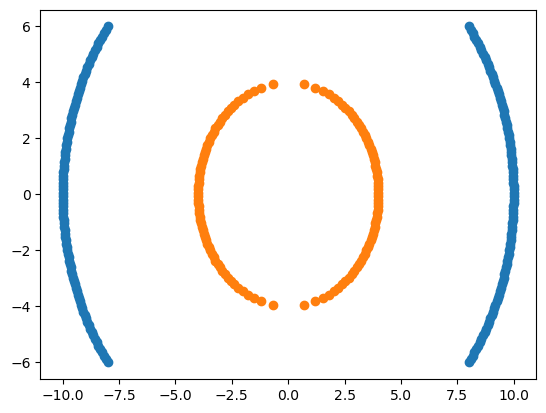

In [61]:
plt.scatter(y, x)
plt.scatter(y1,x1)

In [62]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns = ["x1", "x2"])
df1["y"] = 0

df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ["x1", "x2"])
df2["y"] = 1

df = pd.concat([df1, df2], ignore_index = True)
df.head()

,x1,x2,y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0


In [63]:
df1= df.copy()
df1

,x1,x2,y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [64]:
df1['x1square'] = df1["x1"]**2
df1['x2square'] = df1["x2"]**2
df1['x1x2'] = df1['x1']*df1["x2"]
df1.head()

,x1,x2,y,x1square,x2square,x1x2
0,8.000000,-6.000000,0,64.000000,36.000000,-48.000000
1,8.089490,-5.878788,0,65.439853,34.560147,-47.556397
2,8.176205,-5.757576,0,66.850321,33.149679,-47.075117
3,8.260230,-5.636364,0,68.231405,31.768595,-46.557662
4,8.341649,-5.515152,0,69.583104,30.416896,-46.005457


In [65]:
df1 = df1.dropna()

In [66]:
x = df1[['x1square', 'x2square', 'x1x2']]
y = df1["y"]

In [67]:
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: y, Length: 332, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)

In [69]:
x_train.shape, x_test.shape

((232, 3), (100, 3))

In [70]:
y_train.shape, y_test.shape

((232,), (100,))

In [71]:
#pip install plotly


In [72]:
import plotyl.express as px
fig = px.scatter_3d(df1, x = "x1square", y = "x2square", z ="x1x2", color = "Y")
fig.show()

ModuleNotFoundError: No module named 'plotyl'

In [75]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
cls = SVC(kernel  = "linear") # why linear >> we have created polynomial
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
accuracy_score(y_pred, y_test)

1.0

In [ ]:
# till now we have done it manually 
# we will use svc kernel's

In [76]:
df = df.dropna()

In [77]:
df.head()

,x1,x2,y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0


In [78]:
x = df[['x1' , 'x2']]
y = df["y"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)

In [79]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
cls = SVC(kernel  = "poly") 
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
accuracy_score(y_pred, y_test)

0.62

In [81]:
# poly kernel didn't perform well, so we used rbf

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
cls = SVC(kernel  = "rbf") 
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
accuracy_score(y_pred, y_test)

1.0

In [82]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
cls = SVC(kernel  = "sigmoid") 
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
accuracy_score(y_pred, y_test)

0.65

In [ ]:
# internal homework